### ÎùºÏù¥Î∏åÎü¨Î¶¨, Îç∞Ïù¥ÌÑ∞ÏÖã Ìò∏Ï∂ú

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tableone import TableOne
from sklearn.manifold import TSNE
import umap
import matplotlib.font_manager as fm
from IPython.core.display import display, HTML

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÎßëÏùÄ Í≥†Îîï)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_14636\822133913.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [3]:
df=pd.read_csv('../real_data/Í≥µÏãúÏßÄÍ∞Ä_Ï†ÑÏ≤òÎ¶¨.csv')

### 1. tableOne
* TableOneÏùÑ ÌÜµÌï¥ Ï£ºÏöî Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ÏôÄ ÌäπÏÑ±ÏùÑ Í∞ÑÎûµÌûà ÌôïÏù∏ÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Ï¥à ÌÜµÍ≥Ñ Íµ¨Ï°∞Î•º ÌååÏïÖ

In [ ]:
# object ÌÉÄÏûÖÏù∏ Ïª¨ÎüºÎì§Îßå Í≥®ÎùºÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÏßÄÏ†ï
categorical = df.select_dtypes(include='object').columns.tolist()
nonnormal=['Í≥µÏãúÏßÄÍ∞Ä','Î©¥Ï†Å'] # Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏßÄÏ†ï
# TableOne ÏÉùÏÑ±
table1 = TableOne(df, categorical=categorical, nonnormal=nonnormal, groupby=None)
# DataFrameÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ï†ÄÏû•
table1_df = table1.tableone.reset_index()
# Î©ÄÌã∞ Ïù∏Îç±Ïä§Î•º Îã®Ïùº Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨, Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ 
table1_df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in table1_df.columns]
# Ï†ÄÏû•
table1_df.to_excel("../real_data/table1_result.xlsx", index=False)

display(HTML(table1.to_html()))


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27480\1374664176.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


groupby Ï†ÅÏö©Ìïú ÌÖåÏù¥Î∏îÏõê

In [7]:
# Í≥µÏãúÏßÄÍ∞ÄÎ•º Í∏∞Ï§ÄÏúºÎ°ú 4Î∂ÑÏúÑ Í∑∏Î£π ÎßåÎì§Í∏∞
df['Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ'] = pd.qcut(df['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä'], 4, labels=['1Q', '2Q', '3Q', '4Q'])

table2 = TableOne(df, categorical=categorical, nonnormal=nonnormal, groupby='Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ')

# DataFrameÏúºÎ°ú Î≥ÄÌôò ÌõÑ Ï†ÄÏû•
table2_df = table2.tableone.reset_index()
# Î©ÄÌã∞ Ïù∏Îç±Ïä§ Ï≤òÎ¶¨
table2_df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in table2_df.columns]
# Ï†ÄÏû•
table2_df.to_excel("../real_data/table2_result.xlsx", index=False)

display(HTML(table2.to_html()))

c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\tableone\preprocessors.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupbylvls = sorted(data.groupby(groupby).groups.keys())  # type: ignore
c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\tableone\tables.py:399: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_cont = pd.pivot_table(cont_data, columns=[groupby], aggfunc=aggfuncs)
c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\tableone\tables.py:399: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pa

### 1-2. t-map

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Ïù∏ÏΩîÎçî ÏÉùÏÑ±
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# train Îç∞Ïù¥ÌÑ∞ fit_transform
df_encoded = encoder.fit_transform(df[categorical_cols])

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Ï†ïÍ∑úÌôî: 'Î©¥Ï†Å'
scaler = MinMaxScaler()
area_scaled = scaler.fit_transform(df[['Î©¥Ï†Å']])  # 2D Ïú†ÏßÄ

# Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ÏôÄ Î©¥Ï†Å Ï†ïÍ∑úÌôî Í≤∞Ìï©
df_final = np.hstack([df_encoded, area_scaled])

In [ ]:

# 1. Î∂ÑÏúÑÏàò ÏÉùÏÑ± (Í≥µÏãúÏßÄÍ∞Ä Í∏∞Ï§Ä)
quartiles = ['1Q', '2Q', '3Q', '4Q']
df['Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ'] = pd.qcut(df['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä'], 4, labels=quartiles)

# 2. Í∞Å Î∂ÑÏúÑÏàòÏóêÏÑú 5,000Í∞úÏî© Í∑†Îì± ÏÉòÌîåÎßÅ
df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(
    lambda x: x.sample(5000, random_state=42)
).copy()
# 3. X_sample ÏÉùÏÑ± 
X_sample = df_final[df_sample.index] 

# 4. t-SNE Ï†ÅÏö© 2Ï∞®Ïõê
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(X_sample)

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27480\1382870589.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27480\1382870589.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(


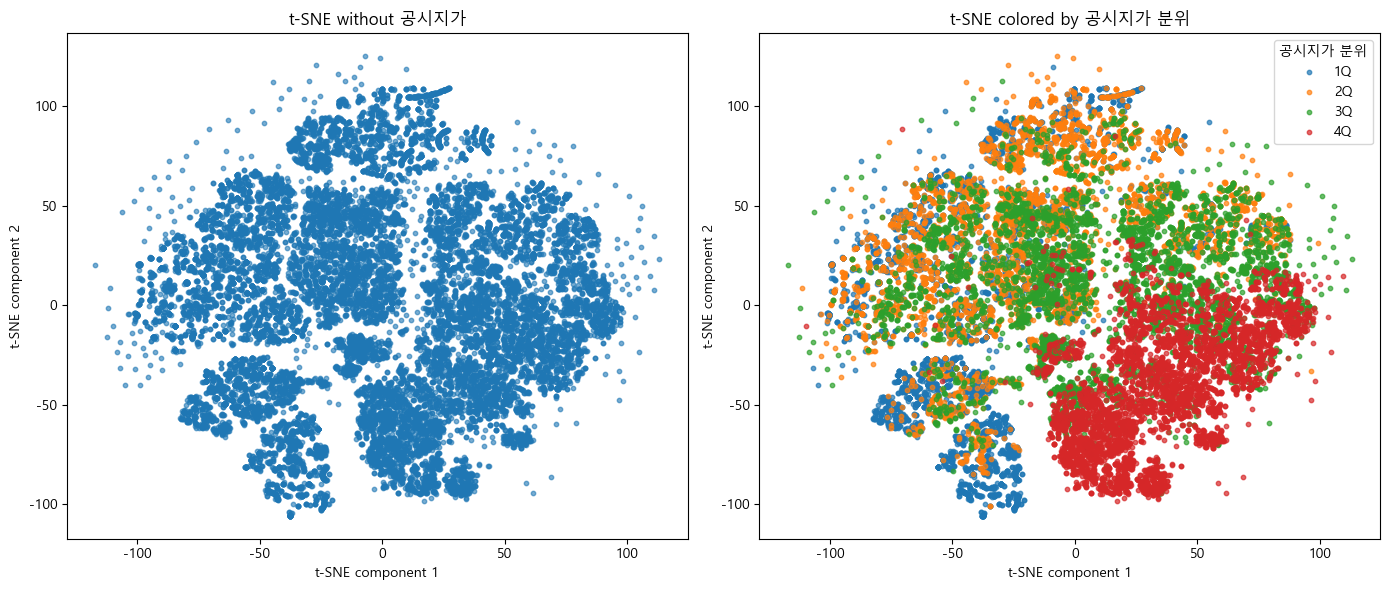

In [ ]:
# Ïù∏Îç±Ïä§ Î¶¨ÏÖã -> Îß§Ïπ≠ Ïò§Î•ò Ï†úÍ±∞ 
df_sample = df_sample.reset_index(drop=True)

# t-SNE ÏãúÍ∞ÅÌôî ÏÑúÎ∏åÌîåÎ°Ø
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ÏôºÏ™Ω: Í≥µÏãúÏßÄÍ∞Ä ÏóÜÏù¥ ÏãúÍ∞ÅÌôî
axes[0].scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, alpha=0.6)
axes[0].set_title('t-SNE without Í≥µÏãúÏßÄÍ∞Ä')
axes[0].set_xlabel('t-SNE component 1')
axes[0].set_ylabel('t-SNE component 2')

# Ïò§Î•∏Ï™Ω: Í≥µÏãúÏßÄÍ∞Ä Î∂ÑÏúÑÏàò ÏÉâÏÉÅ
# Í∞Å Î∂ÑÏúÑ(label)Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Î•º Ïù¥Ïö©Ìï¥ ÏÉâÏÉÅ Íµ¨Î∂Ñ 
for label in quartiles:
    idx = df_sample[df_sample['Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ'] == label].index.to_numpy()  # Ïù¥Ï†ú idxÎäî 0~19999 Î≤îÏúÑ
    axes[1].scatter(df_tsne[idx, 0], df_tsne[idx, 1], s=10, alpha=0.7, label=label)

axes[1].set_title('t-SNE colored by Í≥µÏãúÏßÄÍ∞Ä Î∂ÑÏúÑ')
axes[1].set_xlabel('t-SNE component 1')
axes[1].set_ylabel('t-SNE component 2')
axes[1].legend(title='Í≥µÏãúÏßÄÍ∞Ä Î∂ÑÏúÑ')

plt.tight_layout()
plt.show()


### 1-3. UMAP

In [ ]:
# 1. Í∞Å Î∂ÑÏúÑÏàòÏóêÏÑú 25,000Í∞úÏî© Í∑†Îì± ÏÉòÌîåÎßÅ (Ï¥ù 100,000Í∞ú)
df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(
    lambda x: x.sample(25000, random_state=42)
).copy()
X_sample = df_final[df_sample.index]  

# 2. UMAP ÏàòÌñâ -> Í≥†Î†§Ìï† Ï†ê Í∞úÏàò 15Í∞ú, ÏµúÏÜå Í±∞Î¶¨ 0.1
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
df_umap = umap_model.fit_transform(X_sample)  # shape: (100000, 2)

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27480\639482403.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_27480\639482403.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ', group_keys=False).apply(
c:\Users\jeongbin\Projects\LandValue_project\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was

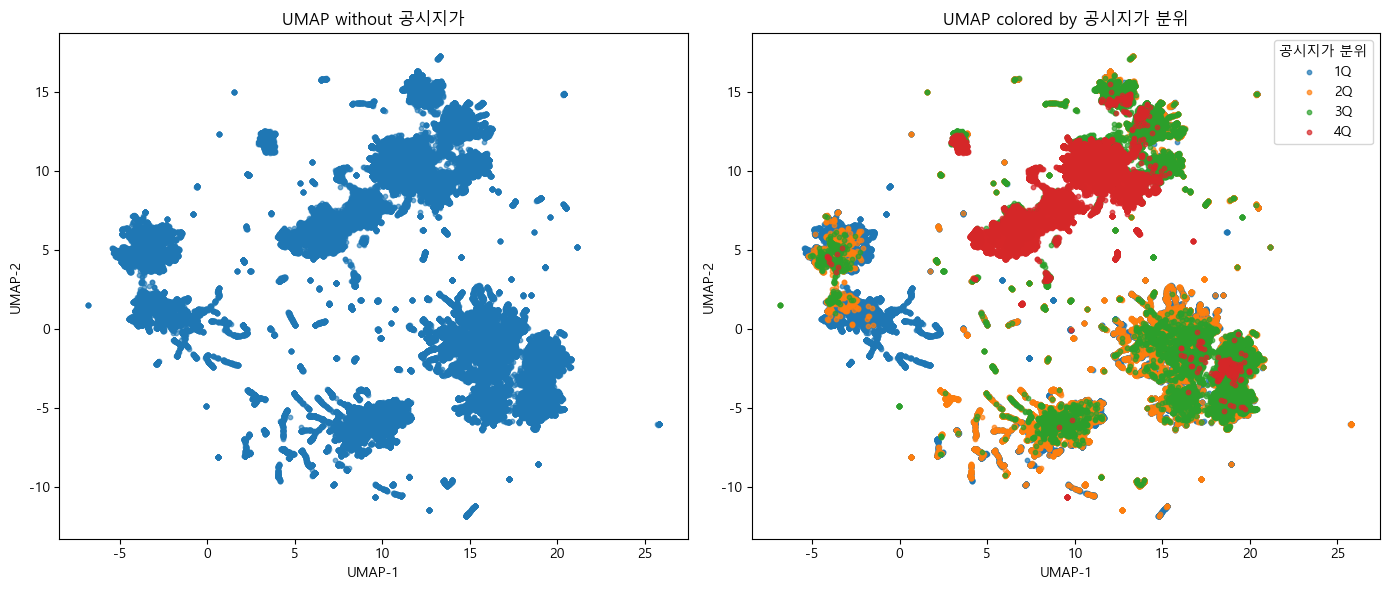

In [ ]:
# Ïù∏Îç±Ïä§ Î¶¨ÏÖã
df_sample = df_sample.reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ÏôºÏ™Ω: Í≥µÏãúÏßÄÍ∞Ä ÏóÜÎäî UMAP Í≤∞Í≥º
axes[0].scatter(df_umap[:, 0], df_umap[:, 1], s=10, alpha=0.6)
axes[0].set_title('UMAP without Í≥µÏãúÏßÄÍ∞Ä')
axes[0].set_xlabel('UMAP-1')
axes[0].set_ylabel('UMAP-2')

# Ïò§Î•∏Ï™Ω: Í≥µÏãúÏßÄÍ∞Ä 4Î∂ÑÏúÑÎ°ú ÏÉâÏÉÅÏßÄÏ†ïÌïú UMAP Í≤∞Í≥º 
for label in quartiles:
    idx = df_sample[df_sample['Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ'] == label].index.to_numpy()
    axes[1].scatter(df_umap[idx, 0], df_umap[idx, 1], s=10, alpha=0.7, label=label)

axes[1].set_title('UMAP colored by Í≥µÏãúÏßÄÍ∞Ä Î∂ÑÏúÑ')
axes[1].set_xlabel('UMAP-1')
axes[1].set_ylabel('UMAP-2')
axes[1].legend(title='Í≥µÏãúÏßÄÍ∞Ä Î∂ÑÏúÑ')

plt.tight_layout()
plt.show()

### 2-1. CCA

In [34]:
from sklearn.cross_decomposition import CCA
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Ïù∏ÏΩîÎî©Îêú Î≥ÄÏàòÎ™Ö Í∞ÄÏ†∏Ïò§Í∏∞
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Î©¥Ï†Å Ïª¨Îüº Ï∂îÍ∞ÄÌï¥ÏÑú Ï†ÑÏ≤¥ Ïª¨Îüº Î¶¨Ïä§Ìä∏ Íµ¨ÏÑ±
final_columns = list(encoded_feature_names) + ['Î©¥Ï†Å']

# numpy Î∞∞Ïó¥ ‚Üí DataFrame Î≥ÄÌôò
df_final = pd.DataFrame(df_final, columns=final_columns)

#### Îã®Î≥ÄÎüâ

In [ ]:
# Í≥µÏãúÏßÄÍ∞Ä Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(df[['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä']])

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
results = []

# Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú CCA ÏàòÌñâ
for col in df_final.columns:
    X1 = df_final[[col]].values  # (n, 1)
    X2 = y_scaled  # (n, 1)

    cca = CCA(n_components=1, scale=False)
    X1_c, X2_c = cca.fit(X1, X2).transform(X1, X2)

    r = np.corrcoef(X1_c[:, 0], X2_c[:, 0])[0, 1]
    p = linregress(X1_c[:, 0], X2_c[:, 0]).pvalue

    results.append({'Î≥ÄÏàòÎ™Ö': col, 'Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)': r, 'p-value': p})

# Í≤∞Í≥º Ï†ïÎ¶¨
cca_results = pd.DataFrame(results)
cca_results = cca_results.sort_values(by='Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)', key=np.abs, ascending=False).reset_index(drop=True)

# ÏÉÅÏúÑ 10Í∞ú ÌôïÏù∏
print(cca_results.head(10))


             Î≥ÄÏàòÎ™Ö  Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)  p-value
0      ÏãúÎèÑÎ™Ö_ÏÑúÏö∏ÌäπÎ≥ÑÏãú   0.598557      0.0
1       Ïù¥Ïö©ÏÉÅÌô©_ÏÉÅÏóÖÏö©   0.413496      0.0
2      Ï£ºÏúÑÌôòÍ≤Ω_ÏÉÅÏóÖÏßÄÎåÄ   0.397727      0.0
3           ÏßÄÎ™©_ÎåÄ   0.333889      0.0
4   Ïö©ÎèÑÏßÄÏó≠1_ÏùºÎ∞òÏÉÅÏóÖÏßÄÏó≠   0.307336      0.0
5   Ï£ºÏúÑÌôòÍ≤Ω_ÎÜçÏ¥å¬∑Í≤ΩÏûëÏßÄÎåÄ   0.304101      0.0
6      Ïö©ÎèÑÏßÄÍµ¨_Î∞©ÌôîÏßÄÍµ¨   0.241765      0.0
7  Í∏∞ÌÉÄÏ†úÌïú_ÏßÄÍµ¨Îã®ÏúÑÍ≥ÑÌöçÍµ¨Ïó≠   0.234257      0.0
8        ÌòïÏÉÅÎ™Ö_Î∂ÄÏ†ïÌòï   0.216560      0.0
9      ÎèÑÎ°úÍµêÌÜµ_Í¥ëÎåÄÏÜåÍ∞Å   0.212036      0.0


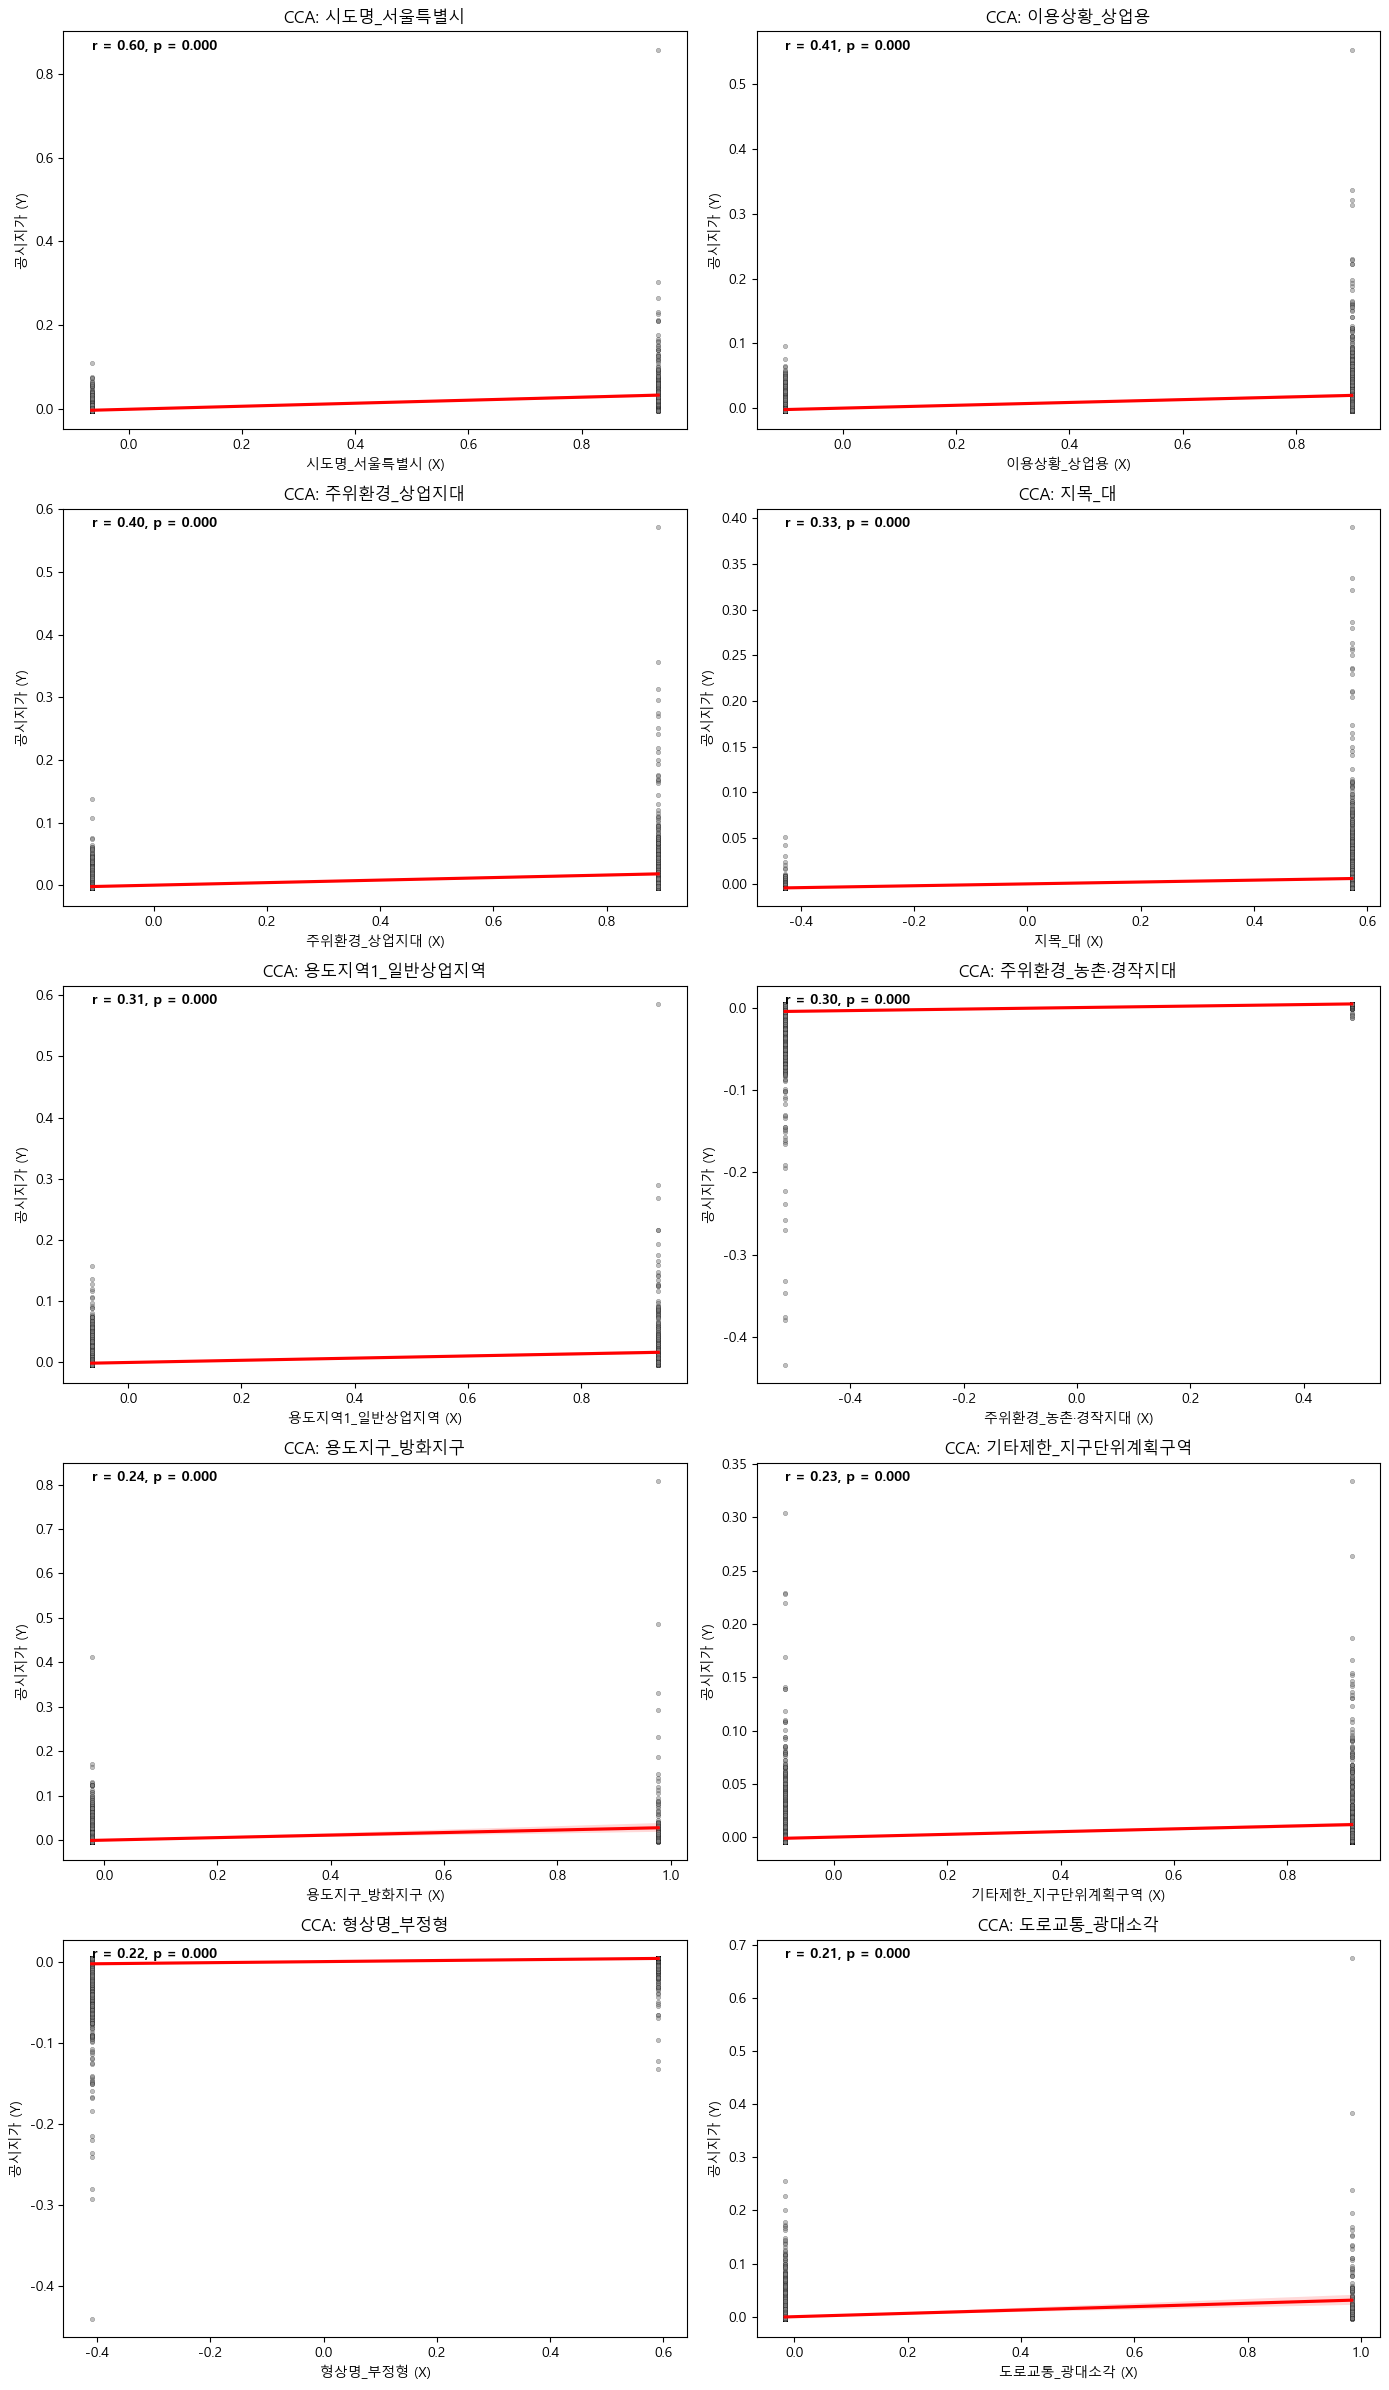

In [ ]:
# ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàò ÏÑ†ÌÉù
top_10 = cca_results.head(10)

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï
fig, axes = plt.subplots(5, 2, figsize=(14, 24))
axes = axes.flatten()

for i, row in enumerate(top_10.itertuples()):
    col = row.Î≥ÄÏàòÎ™Ö  
    X1 = df_final[[col]].values
    X2 = y_scaled # Í≥µÏßÄÏßÄÍ∞Ä Í∞í 

    cca = CCA(n_components=1, scale=False)
    X1_c, X2_c = cca.fit(X1, X2).transform(X1, X2)

    r = np.corrcoef(X1_c[:, 0], X2_c[:, 0])[0, 1] # ÏÉÅÍ¥ÄÍ≥ÑÏàò
    p = linregress(X1_c[:, 0], X2_c[:, 0]).pvalue # pÍ∞í 

    ax = axes[i]

    # Ï†ÑÏ≤¥ Ï§ë 10,000Í∞ú ÏÉòÌîåÎßÅ
    if len(X1_c) > 10000:
        idx = np.random.choice(len(X1_c), 10000, replace=False)
    else:
        idx = np.arange(len(X1_c))
    # ÏÇ∞Ï†êÎèÑ ÌöåÍ∑ÄÏÑ† Í∑∏Î¶¨Í∏∞ 
    sns.scatterplot(x=X1_c[idx, 0], y=X2_c[idx, 0], color='grey', edgecolor='k', s=10, alpha=0.5, ax=ax)
    sns.regplot(x=X1_c[idx, 0], y=X2_c[idx, 0], scatter=False, color='red', ax=ax)
    # Í∑∏ÎûòÌîÑ ÎÇ¥Ïóê, r,p-value text Ï∂îÍ∞Ä
    ax.text(min(X1_c[idx, 0]), max(X2_c[idx, 0]), f'r = {r:.2f}, p = {p:.3f}',
            horizontalalignment='left', size='medium', color='black', weight='semibold')

    ax.set_xlabel(f'{col} (X)')
    ax.set_ylabel('Í≥µÏãúÏßÄÍ∞Ä (Y)')
    ax.set_title(f'CCA: {col}')

plt.tight_layout()
plt.show()


#### Îã§Î≥ÄÎüâ

In [ ]:
from collections import defaultdict

# 2. Í∏∞Ï°¥ Î≥ÄÏàòÎ™Ö Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
grouped_features = defaultdict(list)

for col in df_final.columns:
    base = col.split('_')[0]  # Ïòà: 'ÏßÄÎ™©_ÎåÄ' ‚Üí 'ÏßÄÎ™©' '_'Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÌï† 
    grouped_features[base].append(col) # 'ÏßÄÎ™©'ÏùÑ ÌÇ§Î°ú Î¶¨Ïä§Ìä∏Î°ú Ï∂îÍ∞Ä 

# 3. Í∑∏Î£π Îã®ÏúÑ CCA ÏàòÌñâ
results = []

for base_var, cols in grouped_features.items():

    X = df_final[cols].values
    Y = y_scaled

    cca = CCA(n_components=1, scale=False)
    X_c, Y_c = cca.fit(X, Y).transform(X, Y)

    r = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]
    p = linregress(X_c[:, 0], Y_c[:, 0]).pvalue

    results.append({'Í∏∞Ï°¥ Î≥ÄÏàòÎ™Ö': base_var, 'Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)': r, 'p-value': p})

# 4. Ï†ïÎ¶¨Îêú Í≤∞Í≥º
grouped_cca_results = pd.DataFrame(results).sort_values(by='Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)', key=np.abs, ascending=False).reset_index(drop=True)
print(grouped_cca_results)

       Í∏∞Ï°¥ Î≥ÄÏàòÎ™Ö  Ï†ïÏ§ÄÏÉÅÍ¥ÄÍ≥ÑÏàò(r)        p-value
0         ÏãúÎèÑÎ™Ö   0.623641   0.000000e+00
1       Ïö©ÎèÑÏßÄÏó≠1   0.474303   0.000000e+00
2        Ï£ºÏúÑÌôòÍ≤Ω   0.467864   0.000000e+00
3        Ïù¥Ïö©ÏÉÅÌô©   0.466631   0.000000e+00
4        ÎèÑÎ°úÍµêÌÜµ   0.385252   0.000000e+00
5          ÏßÄÎ™©   0.335851   0.000000e+00
6        Í∏∞ÌÉÄÏ†úÌïú   0.310369   0.000000e+00
7        Ïö©ÎèÑÏßÄÍµ¨   0.280220   0.000000e+00
8         ÌòïÏÉÅÎ™Ö   0.263982   0.000000e+00
9         ÏßÄÏÑ∏Î™Ö   0.186669   0.000000e+00
10       ÏûÑÏïºÍµ¨Î∂Ñ   0.116427   0.000000e+00
11       ÎÜçÏßÄÍµ¨Î∂Ñ   0.106879   0.000000e+00
12       ÏßÄÎ≤àÍµ¨Î∂Ñ   0.106535   0.000000e+00
13  Í≥ÑÌöçÏãúÏÑ§ Ï†ÄÏ¥âÏó¨Î∂Ä   0.049676  3.011082e-252
14         Î©¥Ï†Å   0.041473  2.183038e-176


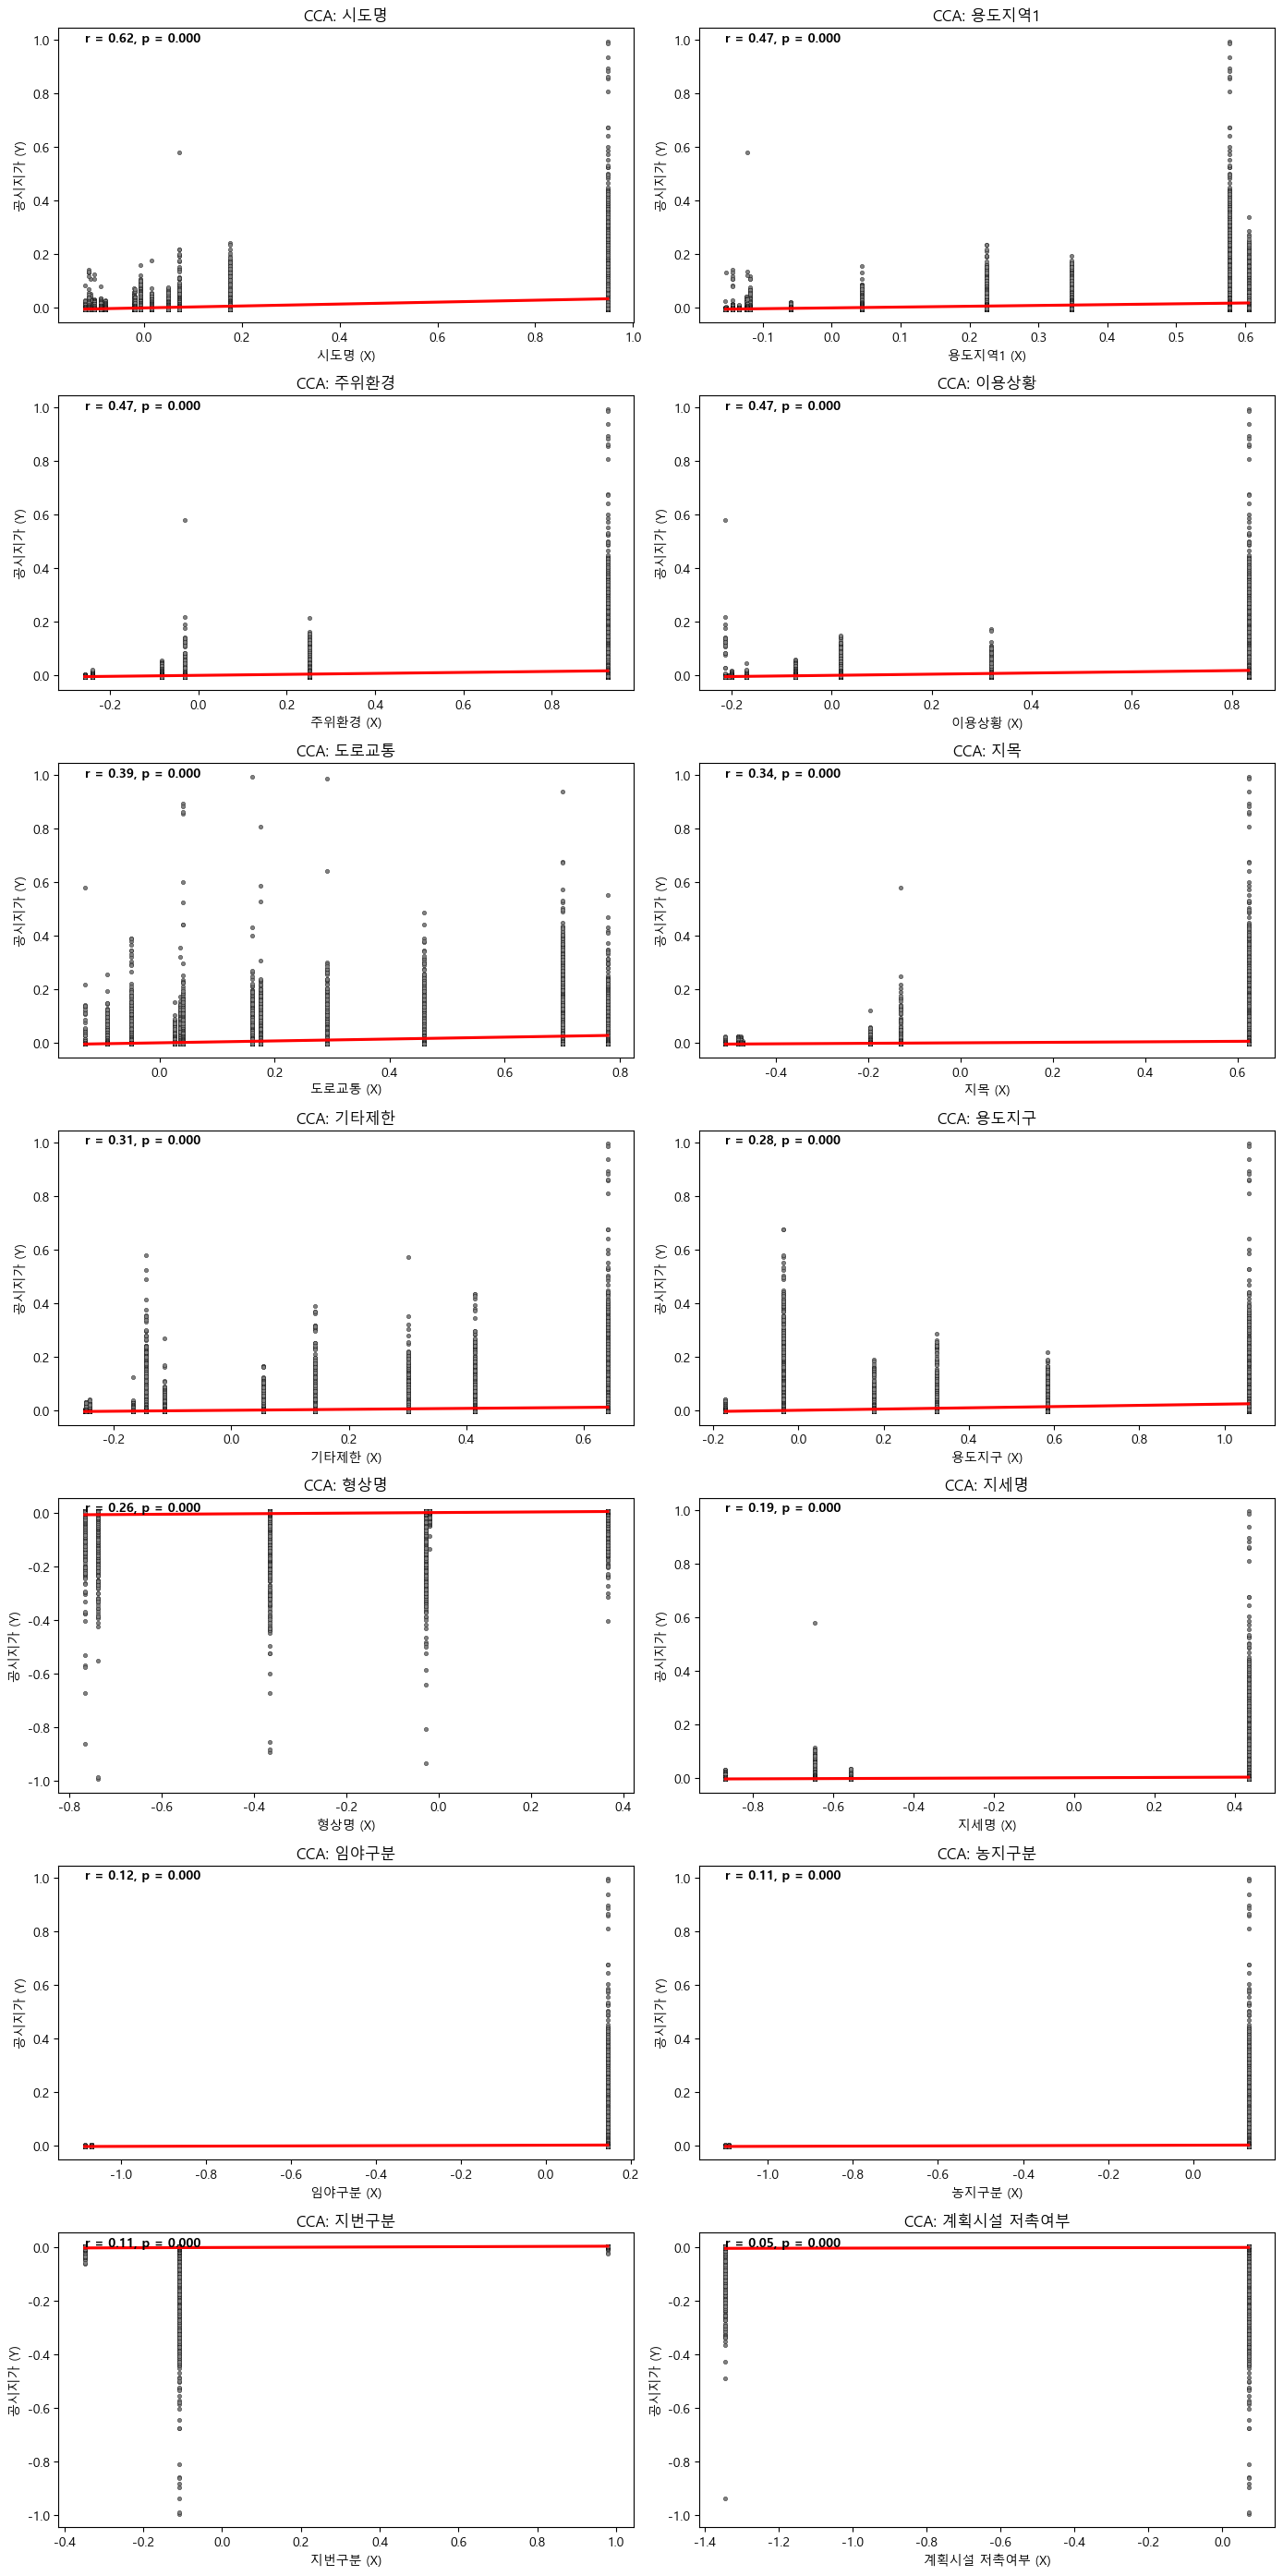

In [ ]:
top_groups = grouped_cca_results.head(14) # Ï†ÑÏ≤¥ Î≥ÄÏàò Îã§ ÏãúÍ∞ÅÌôî 

# ÏÑúÎ∏åÌîåÎ°Ø Íµ¨ÏÑ±
fig, axes = plt.subplots(7, 2, figsize=(14, 28))
axes = axes.flatten()

# ÏãúÍ∞ÅÌôî
for i, row in enumerate(top_groups.itertuples()):
    base_var = row._1  # Í∏∞Ï°¥ Î≥ÄÏàòÎ™Ö
    feature_cols = [col for col in df_final.columns if col.startswith(base_var + "_")]

    X = df_final[feature_cols].values
    Y = y_scaled

    cca = CCA(n_components=1, scale=False)
    X_c, Y_c = cca.fit(X, Y).transform(X, Y)

    r = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]
    p = linregress(X_c[:, 0], Y_c[:, 0]).pvalue

    ax = axes[i]
    sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], color='grey', edgecolor='k', s=10, ax=ax)
    sns.regplot(x=X_c[:, 0], y=Y_c[:, 0], scatter=False, color='red', ax=ax)

    # Ï£ºÏÑù ÌÖçÏä§Ìä∏
    ax.text(min(X_c[:, 0]), max(Y_c[:, 0]), f'r = {r:.2f}, p = {p:.3f}',
            horizontalalignment='left', size='medium', color='black', weight='semibold')

    ax.set_xlabel(f'{base_var} (X)')
    ax.set_ylabel('Í≥µÏãúÏßÄÍ∞Ä (Y)')
    ax.set_title(f'CCA: {base_var}')

plt.tight_layout()
plt.show()

### 2-2. ÌÜµÍ≥Ñ Î∂ÑÏÑù


Í≥µÏãúÏßÄÍ∞ÄÏùò Ï†ïÍ∑úÏÑ±ÏùÑ Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏúºÎØÄÎ°ú, Kruskal-Wallis H-test Í≤ÄÏ†ï

In [4]:
from scipy.stats import kruskal

kruskal_results = []
excluded_vars = []

# Ï†ÑÏ≤¥ Î≥ÄÏàò ÏàúÌöå
for col in df.columns:
    if col in ['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä', 'Í≥µÏãúÏßÄÍ∞Ä_4Î∂ÑÏúÑ']:
        continue  # Ï†úÏô∏Ìï† Ïª¨Îüº

    unique_vals = df[col].nunique()

    if unique_vals <= 2:
        excluded_vars.append(f"{col} (Î≥ÄÏàòÏùò Í∞íÏù¥ {unique_vals}Í∞úÎãàÍπå Ï†úÏô∏)")
        continue # ÌÅ¨Î£®Ïä§Ïπº ÏôàÎ¶¨Ïä§ Í≤ÄÏ†ïÏùÄ 3Í∞ú Ïù¥ÏÉÅÏùò Í∞í(Í∑∏Î£π) ÌïÑÏöî

    try:
        groups = [df[df[col] == val]['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä'] for val in df[col].dropna().unique()]
        stat, p = kruskal(*groups)
        kruskal_results.append({'Î≥ÄÏàòÎ™Ö': col, 'H ÌÜµÍ≥ÑÎüâ': stat, 'p-value': p})
    except Exception as e:
        excluded_vars.append(f"{col} (Ïò§Î•ò Î∞úÏÉù: {str(e)})")

kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='H ÌÜµÍ≥ÑÎüâ', ascending=False).reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Kruskal-Wallis Í≤∞Í≥º")
print(kruskal_df)

print("\n‚ùå Ï†úÏô∏Îêú Î≥ÄÏàò:")
for msg in excluded_vars:
    print(msg)


‚úÖ Kruskal-Wallis Í≤∞Í≥º
      Î≥ÄÏàòÎ™Ö          H ÌÜµÍ≥ÑÎüâ  p-value
0    Ï£ºÏúÑÌôòÍ≤Ω  325413.400321      0.0
1   Ïö©ÎèÑÏßÄÏó≠1  310794.571648      0.0
2    Ïù¥Ïö©ÏÉÅÌô©  303430.475159      0.0
3      Î©¥Ï†Å  292040.511392      0.0
4      ÏßÄÎ™©  273228.617553      0.0
5     ÏãúÎèÑÎ™Ö  215043.366248      0.0
6    ÎèÑÎ°úÍµêÌÜµ  183308.300423      0.0
7    Í∏∞ÌÉÄÏ†úÌïú  151116.688649      0.0
8     ÏßÄÏÑ∏Î™Ö  131612.014712      0.0
9     ÌòïÏÉÅÎ™Ö  130905.909987      0.0
10   ÏûÑÏïºÍµ¨Î∂Ñ  104709.275122      0.0
11   ÏßÄÎ≤àÍµ¨Î∂Ñ   93426.754826      0.0
12   Ïö©ÎèÑÏßÄÍµ¨   43222.230845      0.0
13   ÎÜçÏßÄÍµ¨Î∂Ñ   25782.931703      0.0

‚ùå Ï†úÏô∏Îêú Î≥ÄÏàò:
Í≥ÑÌöçÏãúÏÑ§ Ï†ÄÏ¥âÏó¨Î∂Ä (Î≥ÄÏàòÏùò Í∞íÏù¥ 2Í∞úÎãàÍπå Ï†úÏô∏)


C:\Users\jeongbin\AppData\Local\Temp\ipykernel_14636\4272058645.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kruskal_top, y='Î≥ÄÏàòÎ™Ö', x='H ÌÜµÍ≥ÑÎüâ', palette='viridis')


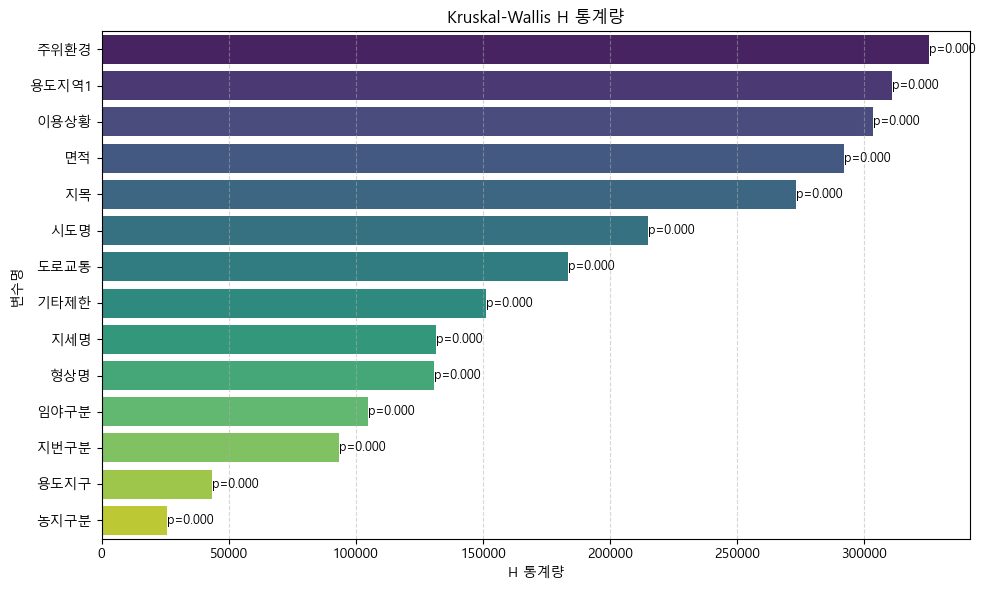

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# H ÌÜµÍ≥ÑÎüâ Í∏∞Ï§Ä Ï†ïÎ†¨
kruskal_df_sorted = kruskal_df.sort_values(by='H ÌÜµÍ≥ÑÎüâ', ascending=False).reset_index(drop=True)

# ÏÉÅÏúÑ 15Í∞úÎßå ÏãúÍ∞ÅÌôî (ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï Í∞ÄÎä•)
top_n = 15
kruskal_top = kruskal_df_sorted.head(top_n)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(data=kruskal_top, y='Î≥ÄÏàòÎ™Ö', x='H ÌÜµÍ≥ÑÎüâ', palette='viridis')

# Í∞Å ÎßâÎåÄ ÎÅùÏóê p-value ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i, row in kruskal_top.iterrows():
    pval_str = f"{row['p-value']:.3f}"
    plt.text(row['H ÌÜµÍ≥ÑÎüâ'] + 0.5, i, f"p={pval_str}", va='center', fontsize=9)

plt.title(f'Kruskal-Wallis H ÌÜµÍ≥ÑÎüâ')
plt.xlabel('H ÌÜµÍ≥ÑÎüâ')
plt.ylabel('Î≥ÄÏàòÎ™Ö')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


* Î™®Îì† p-valueÍ∞Ä 0.0 (Ï¶â, Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìï®) ‚Üí Í∞Å Î≥ÄÏàò Í∑∏Î£π Í∞ÑÏóê Í≥µÏãúÏßÄÍ∞ÄÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå
* Ï£ºÏúÑÌôòÍ≤Ω, Ïö©ÎèÑÏßÄÏó≠1, Ïù¥Ïö©ÏÉÅÌô© Îì±ÏùÄ H Í∞íÏù¥ ÎÜíÏùå ‚Üí Í≥µÏãúÏßÄÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ• Ï§Ñ Í∞ÄÎä•ÏÑ± ÎÜíÏùå
* ÎÜçÏßÄÍµ¨Î∂Ñ, Ïö©ÎèÑÏßÄÍµ¨Îäî ÎπÑÍµêÏ†Å ÎÇÆÏùå ‚Üí ÏòÅÌñ•Î†•Ïù¥ ÎçúÌï† Ïàò ÏûàÏùå

In [ ]:
from scipy.stats import mannwhitneyu

# Î∂ÑÏÑù ÎåÄÏÉÅ Î≥ÄÏàò
binary_col = 'Í≥ÑÌöçÏãúÏÑ§ Ï†ÄÏ¥âÏó¨Î∂Ä' # Ïù¥ÏßÑ Î≥ÄÏàòÏù¥ÎØÄÎ°ú, Îßå ÌúòÌä∏Îãà Í≤ÄÏ†ï Ïã§Ïãú

# Îëê Í∑∏Î£π ÎÇòÎàÑÍ∏∞
group1 = df[df[binary_col] == df[binary_col].unique()[0]]['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä']
group2 = df[df[binary_col] == df[binary_col].unique()[1]]['ÎÇ¥ÎÖÑ_Í≥µÏãúÏßÄÍ∞Ä']

# Mann-Whitney U Test
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"‚úÖ Mann-Whitney U Test Í≤∞Í≥º for '{binary_col}'")
print(f"U ÌÜµÍ≥ÑÎüâ = {stat:.2f}")
print(f"p-value = {p:.4f}")


‚úÖ Mann-Whitney U Test Í≤∞Í≥º for 'Í≥ÑÌöçÏãúÏÑ§ Ï†ÄÏ¥âÏó¨Î∂Ä'
U ÌÜµÍ≥ÑÎüâ = 6616319698.00
p-value = 0.0000


uÌÜµÍ≥ÑÎüâÏùÄ Î≥ÄÏàòÏùò Í∞íÏù¥ ÎßéÏïÑÏÑú ÌÅ¨Í≤å Î∞úÏÉù. 

Í≥ÑÌöçÏãúÏÑ§ Ï†ÄÏ¥âÏó¨Î∂ÄÏóê Îî∞Îùº Í≥µÏãúÏßÄÍ∞ÄÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î¶Ñ

### VIF Ï†úÍ±∞

In [ ]:
# Ïã§Ìóò Ïû¨ÌòÑ
import pickle
with open("./split_data/split_data_3way.pkl", "rb") as f:
    X_train, X_valid, X_test, y_train, y_valid, y_test = pickle.load(f)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Í≥ÑÏÇ∞ 
def calculate_vif_from_X_train():
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)

vif_result = calculate_vif_from_X_train()
high_vif_cols = vif_result[vif_result["VIF"] > 10]["feature"].tolist()



In [ ]:
# Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ 10Ïù¥ÏÉÅÏù¥ Î≥ÄÏàòÎßå Ï∂úÎ†•
high_vif_result = vif_result[vif_result["VIF"] > 10]
for _, row in high_vif_result.iterrows():
    print(f"üìå Î≥ÄÏàò: {row['feature']} | VIF: {row['VIF']:.2f}")


üìå Î≥ÄÏàò: ÏûÑÏïºÍµ¨Î∂Ñ_ÎπÑÏûÑÏïº | VIF: 441.64
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_ÏûêÏó∞Î¶º | VIF: 175.31
üìå Î≥ÄÏàò: Ï£ºÏúÑÌôòÍ≤Ω_ÎÜçÏ¥å¬∑Í≤ΩÏûëÏßÄÎåÄ | VIF: 165.47
üìå Î≥ÄÏàò: Ï£ºÏúÑÌôòÍ≤Ω_ÏÇ∞Î¶ºÏßÄÎåÄ | VIF: 142.61
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_Îã®ÎèÖÏ£ºÌÉù | VIF: 110.02
üìå Î≥ÄÏàò: ÏßÄÏÑ∏Î™Ö_ÌèâÏßÄ | VIF: 102.93
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_Ï†Ñ | VIF: 94.34
üìå Î≥ÄÏàò: Í∏∞ÌÉÄÏ†úÌïú_Í∏∞ÌÉÄ | VIF: 90.23
üìå Î≥ÄÏàò: ÏßÄÎ™©_ÎåÄ | VIF: 88.10
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_Îãµ | VIF: 76.87
üìå Î≥ÄÏàò: ÎÜçÏßÄÍµ¨Î∂Ñ_ÎπÑÎÜçÏßÄ | VIF: 76.71
üìå Î≥ÄÏàò: Ï£ºÏúÑÌôòÍ≤Ω_Ï£ºÍ±∞ÏßÄÎåÄ | VIF: 66.07
üìå Î≥ÄÏàò: ÏßÄÎ™©_ÏûÑÏïº | VIF: 56.29
üìå Î≥ÄÏàò: Ïö©ÎèÑÏßÄÍµ¨_ÎØ∏ÏßÄÏ†ï | VIF: 54.98
üìå Î≥ÄÏàò: ÏßÄÏÑ∏Î™Ö_ÏôÑÍ≤ΩÏÇ¨ÏßÄ | VIF: 54.91
üìå Î≥ÄÏàò: ÏßÄÎ™©_Îãµ | VIF: 53.59
üìå Î≥ÄÏàò: ÎèÑÎ°úÍµêÌÜµ_ÏÑ∏Î°ú(Í∞Ä) | VIF: 50.48
üìå Î≥ÄÏàò: ÏßÄÎ™©_Ï†Ñ | VIF: 46.53
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_ÏÉÅÏóÖÏö© | VIF: 44.28
üìå Î≥ÄÏàò: Ï£ºÏúÑÌôòÍ≤Ω_ÏÉÅÏóÖÏßÄÎåÄ | VIF: 37.32
üìå Î≥ÄÏàò: Ïù¥Ïö©ÏÉÅÌô©_Ï£ºÏÉÅÏö© | VIF: 27.82
üìå Î

In [9]:
# Î≥ÄÏàò Ï†úÍ±∞
X_train = X_train.drop(columns=high_vif_cols)
X_valid = X_valid.drop(columns=high_vif_cols)
X_test = X_test.drop(columns=high_vif_cols)

In [ ]:
# VIF Ï†úÍ±∞ Î≤ÑÏ†Ñ Ï†ÄÏû•
'''
with open("./split_data/VIF_split_data_3way.pkl", "wb") as f:
    pickle.dump((X_train, X_valid, X_test, y_train, y_valid, y_test), f)
'''